In [1]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor  
import random

import sklearn.linear_model
import pandas as pd 
import numpy as np
import sys
import re

%matplotlib inline

In [2]:
# Load the train and test Dataset
X_train = pd.read_csv("/Users/sezin/PycharmProjects/Per-Title_encoding/Data-PreProcessing/export_df_train.csv", encoding = 'utf8')
X_test = pd.read_csv("/Users/sezin/PycharmProjects/Per-Title_encoding/Data-PreProcessing/export_df_test.csv", encoding = 'utf8')
y_train = pd.read_csv("/Users/sezin/PycharmProjects/Per-Title_encoding/Data-PreProcessing/export_df_train_y.csv", encoding = 'utf8')
y_test = pd.read_csv("/Users/sezin/PycharmProjects/Per-Title_encoding/Data-PreProcessing/export_df_test_y.csv", encoding = 'utf8')

In [3]:
X_train

,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,nr_of_images,nr_of_image_shifts,"African chameleon, Chamaeleo chamaeleon","American egret, great white heron, Egretta albus",Dutch oven,...,video_profile_High 4:2:2,video_profile_High 4:4:4 Predictive,video_profile_Main,video_profile_Profile 0,clip_frame_rate_24/1,clip_frame_rate_24000/1001,clip_frame_rate_25/1,clip_frame_rate_30000/1001,clip_frame_rate_45000/1877,clip_frame_rate_50/1
0,19,378608416,159254815,50,163450.0,2,11,81.73,0.00,0.0,...,1,0,0,0,0,0,0,1,0,0
1,19,33240115,13981856,45,49914.0,2,9,0.00,0.00,0.0,...,1,0,0,0,0,0,0,1,0,0
2,141,178911467,10164894,45,48338.0,7,9,0.00,0.00,0.0,...,0,0,1,0,0,1,0,0,0,0
3,121,145746701,9609672,40,39587.0,4,7,0.00,0.00,0.0,...,0,0,1,0,1,0,0,0,0,0
4,171,204032989,9531222,30,180835.0,6,8,0.00,0.00,0.0,...,0,0,1,0,0,1,0,0,0,0
5,111,133146067,9637172,35,90781.0,5,15,0.00,0.00,0.0,...,0,0,1,0,0,1,0,0,0,0
6,149,181482295,9712553,25,342181.0,1,1,0.00,0.00,0.0,...,0,0,1,0,0,1,0,0,0,0
7,182,281454443,12370128,29,224534.0,3,3,0.00,0.00,0.0,...,0,1,0,0,0,0,0,0,0,1
8,166,196178369,9478169,35,1049211.0,8,10,0.00,0.00,0.0,...,0,0,1,0,1,0,0,0,0,0
9,125,151861446,9709811,33,103676.0,2,2,0.00,0.00,0.0,...,0,0,1,0,0,0,1,0,0,0


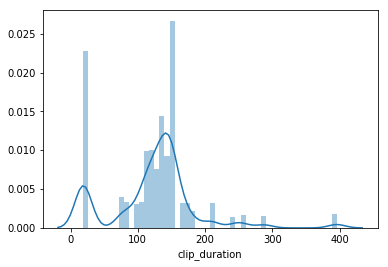

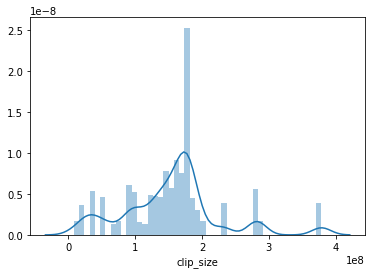

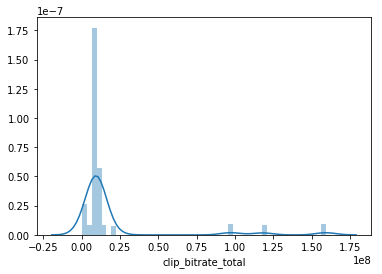

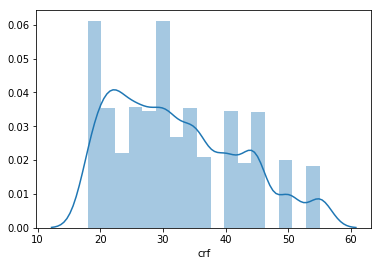

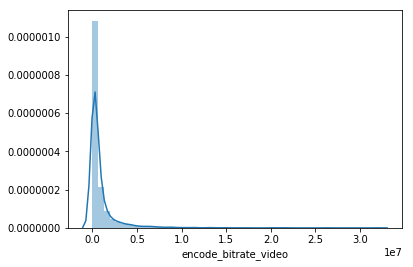

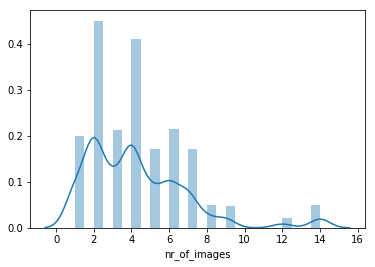

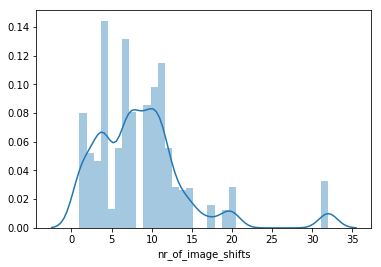

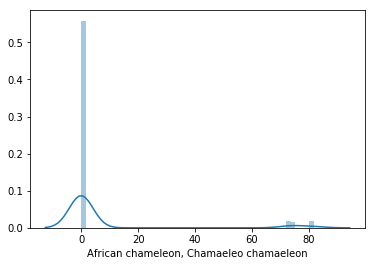

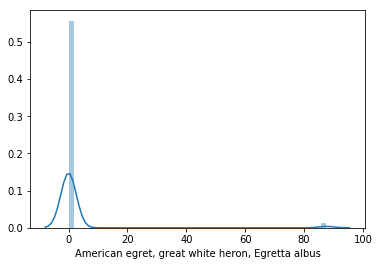

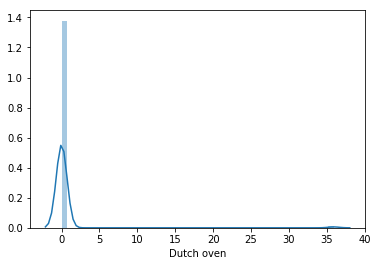

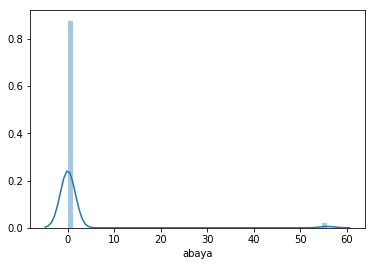

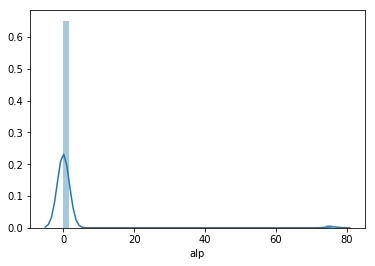

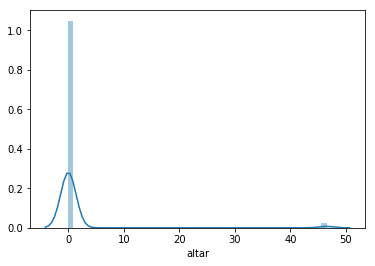

LinAlgError: singular matrix

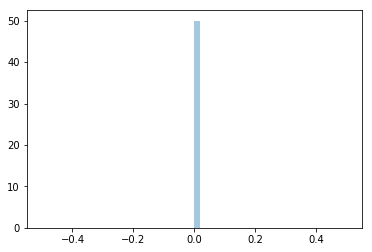

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for column in list(X_train):
    #plt.hist(e_train[column])
    sns.distplot(X_train[column])
    plt.show()

# Normalise numerical Data

In [5]:
from sklearn.preprocessing import MinMaxScaler
from joblib import dump, load
import numpy as np

numerical_columns =['clip_duration', 'clip_size', 'clip_bitrate_total', 'encode_bitrate_video','crf','nr_of_images','nr_of_image_shifts',] 

for column in numerical_columns:
    normalizer = MinMaxScaler()
    normalizer.fit(X_train[column].values.reshape(-1,1))
    dump(normalizer, f"{column}_normalizer.pkl")
    X_train[column] = normalizer.transform(X_train[column].values.reshape(-1,1))
    X_test[column] = normalizer.transform(X_test[column].values.reshape(-1,1))

In [6]:
print(X_train.shape)
print(X_test.shape)

(3680, 182)
(921, 182)


# SVR

In [7]:
import pandas as pd
from sklearn.svm import SVR
from joblib import load, dump
from sklearn.metrics import mean_squared_error as mse

from sklearn.linear_model import LinearRegression
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
print(mse(y_pred, y_test))

/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


54.391606704311535


In [ ]:
'''from sklearn.metrics import mean_absolute_error as mae

y_pred_test = linear_regression_model.predict(X_test)
y_scaler = load('vmaf_normalizer.pkl')
y_pred_test = y_scaler.inverse_transform(np.array(y_pred_test).reshape(-1,1))
y_test = y_scaler.inverse_transform(np.array(y_test).reshape(-1,1))

print("Linear Regression - Mean Absolute Error:", mae(y_pred=y_pred_test, y_true=y_test))
print("Linear Regression - Mean Absolute Percentage Error:", np.mean(abs(y_test-y_pred_test)/abs(y_test)),"%")'''

In [8]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.855524582726227
Mean Squared Error: 54.391606704311535
Root Mean Squared Error: 7.375066555924192


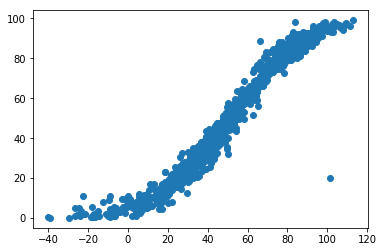

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.show()

# Linear Regression

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(mse(y_pred_lr, y_test))

50.6129350520177


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))) 

Mean Absolute Error: 4.997002898192071
Mean Squared Error: 50.6129350520177
Root Mean Squared Error: 7.114276846736968


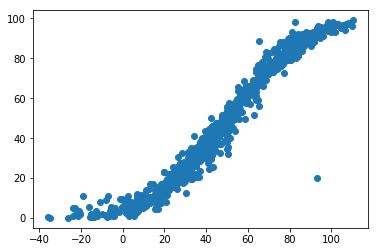

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_lr, y_test)
plt.show()

# Neural Network

In [19]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100, 250, 50))
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print(mse(y_pred_nn, y_test))

/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


41.98560834820784


In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_nn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_nn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn))) 

Mean Absolute Error: 4.368356970789485
Mean Squared Error: 41.98560834820784
Root Mean Squared Error: 6.479630263233222


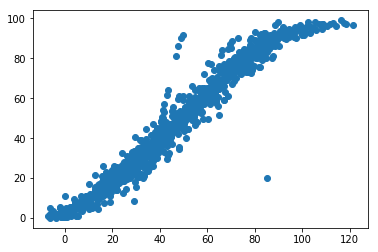

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_nn, y_test)
plt.show()

# Random Forest Regressor

/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


9.114321403689827


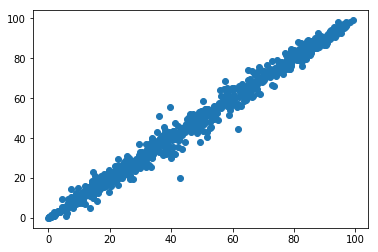

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(mse(y_pred_rf, y_test))

import matplotlib.pyplot as plt

plt.scatter(y_pred_rf, y_test)
plt.show()

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))) 

Mean Absolute Error: 2.076292765906623
Mean Squared Error: 9.114321403689827
Root Mean Squared Error: 3.018993442140911


In [31]:
# Using Randomized Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

#param_dist = {'}

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

'''n_iter_search = 20
clfrs = RandomizedSearchCV(regressor3, 
                                   param_distributions=param_dist,
                                   scoring='neg_mean_squared_error',
                                   cv=5 , n_jobs=1, verbose=1,
                                   n_iter=n_iter_search)
clfrs.fit(df_train_x, df_train_y)
clfrs.best_params_, clfrs.best_score_'''

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


"n_iter_search = 20\nclfrs = RandomizedSearchCV(regressor3, \n                                   param_distributions=param_dist,\n                                   scoring='neg_mean_squared_error',\n                                   cv=5 , n_jobs=1, verbose=1,\n                                   n_iter=n_iter_search)\nclfrs.fit(df_train_x, df_train_y)\nclfrs.best_params_, clfrs.best_score_"

In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 30.5min finished
/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [39]:
best=rf_model.best_estimator_
print(best)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [40]:
rfbest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
# Fit the random search model
rfbest.fit(X_train, y_train)

/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [41]:
y_pred_rf_best = rfbest.predict(X_test)
print(mse(y_pred_rf_best, y_test))

7.714846414508224


In [42]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf_best))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf_best))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_best))) 

Mean Absolute Error: 1.8872368579856469
Mean Squared Error: 7.714846414508224
Root Mean Squared Error: 2.7775612350600345


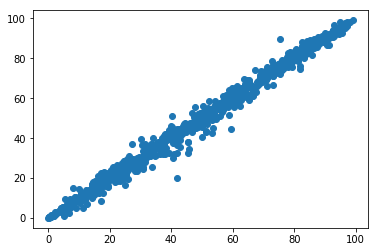

In [43]:
plt.scatter(y_pred_rf_best, y_test)
plt.show()